## 1. Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
diretorio=os.getcwd()
diretorio

'/Users/igoracmorais/igor/4labs/consulting/score_credito/explicando_scorecard'

## 2. Dados
Os dados usados para essa ilustração podem ser obtidos no link do Kagle. O banco de dados original possui diversas imperfeições e foi aqui filtrado para poucas colunas com cada uma das 1.000 linhas representando as características de uma pessoa que buscou credito.

In [10]:
df = pd.read_csv('german_credit_data.csv',index_col=0)
print(df.shape)
df.head(2)

(1000, 10)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,yes
1,22,female,2,own,little,moderate,5951,48,radio/TV,no


=========================

Como os dados originais nao vieram com a coluna de default, para esse exercicio fiz um preenchimento aleatorio usando o numpy. A seguir, o banco de dados é salvo novamente. Sendo assim, o passo abaixo é feito apenas uma unica vez. Mas, fica aqui registrado caso se queira repetir. Porem, como é aleatorio, os resultados finais nao serao iguais.

In [ ]:
#df['default'] =np.where(np.random.normal(0.0, 1.0, size=1000)<=0.5,'no','yes')
#df['default'].value_counts()
#df.to_csv('german_credit_data.csv')

======================

In [11]:
df['default'].value_counts()

no     707
yes    293
Name: default, dtype: int64

Age: idade (numerico)   <br>
Sex: sexo (string: male, female)  <br>
Job: grau de instrução da pessoa (numerico: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)  <br>
Housing: situacao residencial (string: own, rent, or free)  <br>
Saving accounts: tamanho da conta bancaria (string - little, moderate, quite rich, rich)   <br>
Checking account: quantidade de recurso na conta (numerico, in DM - Deutsch Mark)  <br>
Credit amount: quantidade em credito (numerico, in DM)   <br>
Duration: duracao em meses do credito (numerico, in month)  <br>
Purpose: proposito do credito (string: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others <br>
default: (Variavel objetivo - yes: default; no: pagou)

Temos alguns dados nulos....

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   default           1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Duas variaveis não possuem a quantidade ideal de dados que precisamos e são classificadas como NaN (Not a Number). Temos duas alterntivas aqui: i) eliminar esses dados; ii) usar alguma técnica para preenchimento.

In [13]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
default               0
dtype: int64

=========================

#### Opção 1. eliminar

Se a escolha é por eliminar, isso pode ser facilmente feito usando o comando abaixo...

In [14]:
df2=df.copy()
df2=df2.dropna()
print(df2.shape)
df2.isnull().sum()

(522, 10)


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
default             0
dtype: int64

Mas isso nos deixaria com muito menos dados que o banco de dados original. E, portanto, não se configura como uma boa opção.

In [16]:
df2.shape

(522, 10)

==========================

#### Opção 2. Preencher
A escolha pelo preenchimento nos leva a dois caminhos. <br>
#### 1. simplesmente colocar o valor "NA" no lugar de NaN:

In [17]:
df3=df.copy()
df3['Saving accounts']=df3['Saving accounts'].fillna(value='NA')
df3['Checking account']=df3['Checking account'].fillna(value='NA')
print(df3.shape)
df3.isnull().sum()

(1000, 10)


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
default             0
dtype: int64

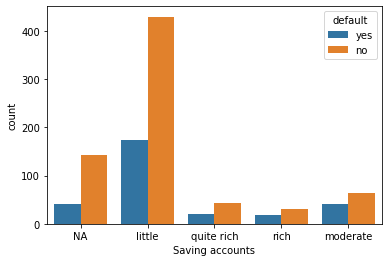

In [18]:
sns.countplot(x='Saving accounts',data=df3,hue='default');

e, com isso, deixar que as estimativas seguintes considerem o NA como uma nova classe ou simplesmente eliminar. Essa não é uma boa escolha, ainda mais considerando que existem diversas ferramentas que podemos usar para fazer isso. E um cientista de dados tem que ser capaz de preencher dados assim, ainda mais quando não temos muitos.

===================================

#### 2. escolher alguma tecnica de preenchimento para determinar o valor. 
O sklearn oferece algumas opções e vamos explorar aqui. De outra forma também pode ser usada alguma tecnica de Machine Learning, como random forest, para fazer isso.

#### 2.1. SimpleImputer

In [19]:
from sklearn.impute import SimpleImputer

tecnica que preenche os valores de uma coluna considerando apenas a informação na coluna
https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

As duas variaveis que temos que preencher sao categoricas possuindo diferentes classes:

In [21]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [22]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

Nesse caso, ao usar esse recurso, só nos resta a opção de escolha "most_frequent", como ilustrado abaixo:

In [23]:
# escolhendo o valor mais frequente. Pode ser: "median", "mean", "constant"
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df4=df.copy()
df4['Saving accounts']=pd.DataFrame(imp.fit_transform(df4[['Saving accounts']]))
df4['Checking account']=pd.DataFrame(imp.fit_transform(df4[['Checking account']]))
print(df4.shape)
df4.isnull().sum()

(1000, 10)


Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
default             0
dtype: int64

Dessa forma, todos os valores imputados vão para a classe "little", por ser a mais frequente.

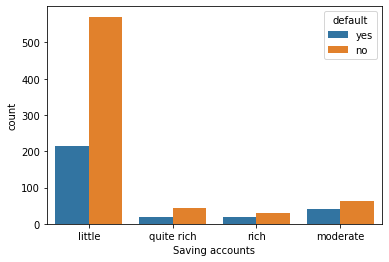

In [24]:
sns.countplot(x='Saving accounts',data=df4,hue='default');

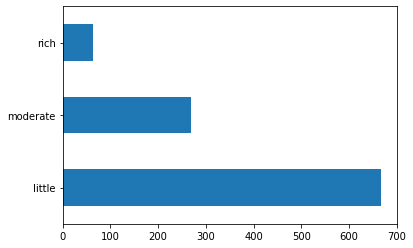

In [25]:
df4['Checking account'].value_counts().plot.barh();

#### 2.2. IterativeImputer
Até o momento que esse notebook foi feito, o recurso mostrado a seguir ainda estava em fase experimental. Nesse caso, antes de chamar o IterativeImputer, habilitamos o enable_iterative_imputer, como mostrado abaixo:

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

O algoritmo acima faz uso de um processo de iteração e de outros algoritmos, do tipo random forest e gradient boosting, para preencher os dados nulos de diversas variaveis ao mesmo tempo. Nesse caso, não são completados os dados de apenas uma coluna e, sim, de várias, considerando as informações contidas nas demais variaveis. É, sem dúvida, um avanço em relação ao método simples, apresentado acima. Mas, temos um problema. As nossas variáveis que contém dados nulos são categoricas, e o metodo so funciona para dados do tipo inteiro ou float. Especificamente no nosso caso, as duas variaveis que queremos preencher podem ser ordenadas, facilitando o processo. Abaixo como ordenamos as duas variaveis: <br>
1. Saving accounts: little=1; moderate=2; rich=3; quite rich=4
2. Checking account: little=1; moderate=2; rich=3  <br>
<br>
Alem disso usamos como previsores as variaveis age, job, credit amount e duration. E, ao converter a variavel "Sex" para inteiro com female=0 e male=1, também podemos usar ela nas estimativas.

In [91]:
df2=df.copy()
df2['Sex']=np.where(df2['Sex']=='female',0,1)
df2['Saving accounts']=df2['Saving accounts'].replace({'little':1,'moderate':2,
                                                       'rich':3,'quite rich':4})
df2['Checking account']=df2['Checking account'].replace({'little':1,'moderate':2,
                                                       'rich':3})
df2.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,1,2,own,NaN,1.0,1169,6,radio/TV,yes
1,22,0,2,own,1.0,2.0,5951,48,radio/TV,no


Apos fazer as transformações nas variaveis que usaremos, o passo seguinte seria criar o estimador e aplicar o mesmo. Ao final veja que já não temos mais variaveis nulas. Um detalhe importante aqui é que o banco de dados gerado não possui os mesmos indices do banco de dados original. Esse é um ponto importante quando tentarmos juntar essa estimativa com nosso banco de dados anterior. Outro ponto de destaque é que as colunas não possuem nomes, mas seguem a ordem dos dados selecionados.

In [92]:
variaveis=df2[['Age', 'Sex', 'Job', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration']]
imputer=IterativeImputer(initial_strategy='most_frequent',imputation_order='random',
                         random_state=123)
imputer.fit(variaveis)
variaveis2=pd.DataFrame(imputer.transform(variaveis)).astype(int)
print(variaveis2.isnull().sum())
variaveis2.head(2)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


,0,1,2,3,4,5,6
0,67,1,2,1,1,1169,6
1,22,0,2,1,2,5951,48


O passo seguinte seria pegar esses valores e colocar no banco de dados origninal, não se esquecendo que os indices nao sao iguais e a ordem das colunas. Ao final testamos se ainda existem dados nulos.

In [93]:
df2['Saving accounts']=variaveis2[3].values.astype(int)
df2['Checking account']=variaveis2[4].values.astype(int)
df2.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
default             0
dtype: int64

A parte final é o ajuste para as variaveis com as caracteristicas anteriores.

In [94]:
sa=['little','moderate','rich','quite rich']
for h in range(1,5):
    df2['Saving accounts'].replace(h,sa[h-1],inplace=True)

In [103]:
df2['Sex']=np.where(df2['Sex']==0,'female','male')

In [95]:
ca=['little','moderate','rich']
for h in range(1,4):
    df2['Checking account'].replace(h,ca[h-1],inplace=True)
df2.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,1,2,own,little,little,1169,6,radio/TV,yes
1,22,0,2,own,little,moderate,5951,48,radio/TV,no


#### 2.3. KNN
Uma terceira opção para preenchimento de valores nulos seria usar o método KNN, usando a distância euclidiana para encontrar o "vizinho mais proximo". Os passos são os mesmo que feitos anteriormente.

In [108]:
df3=df.copy()
df3['Sex']=np.where(df3['Sex']=='female',0,1)
df3['Saving accounts']=df3['Saving accounts'].replace({'little':1,'moderate':2,
                                                       'rich':3,'quite rich':4})
df3['Checking account']=df3['Checking account'].replace({'little':1,'moderate':2,
                                                       'rich':3})
variaveis3=df3[['Age', 'Sex', 'Job', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration']]

In [109]:
from sklearn.impute import KNNImputer
imputer2 = KNNImputer(n_neighbors=3, weights="uniform",metric='nan_euclidean')
imputer2.fit_transform(variaveis3)
variaveis4=pd.DataFrame(imputer2.transform(variaveis3)).astype(int)
print(variaveis4.isnull().sum())
variaveis4.head(2)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


,0,1,2,3,4,5,6
0,67,1,2,1,1,1169,6
1,22,0,2,1,2,5951,48


In [110]:
df3['Saving accounts']=variaveis4[3].values.astype(int)
df3['Checking account']=variaveis4[4].values.astype(int)
df3.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
default             0
dtype: int64

In [111]:
sa=['little','moderate','rich','quite rich']
for h in range(1,5):
    df3['Saving accounts'].replace(h,sa[h-1],inplace=True)

In [112]:
df3['Sex']=np.where(df3['Sex']==0,'female','male')

In [113]:
ca=['little','moderate','rich']
for h in range(1,4):
    df3['Checking account'].replace(h,ca[h-1],inplace=True)
df3.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,male,2,own,little,little,1169,6,radio/TV,yes
1,22,female,2,own,little,moderate,5951,48,radio/TV,no


#### 2.4. Comparando IterativeImputer com KNN

comparando Saving accounts

Para fazer essa comparação vamos usar a função crosstab e ver a distribuição dos dados pelas características. No caso do IterativeImputer aplicado para Saving account, a maior parte dos dados foi para a característica little.

In [96]:
pd.crosstab(df2['default'],df2['Saving accounts'],
            margins=True,margins_name='Total',
           values=df2.default,aggfunc='count')

Saving accounts,little,moderate,quite rich,rich,Total
default,,,,,
no,571,63,43,30,707
yes,215,40,20,18,293
Total,786,103,63,48,1000


A seguir, temos a distribuição a partir do uso do estimador KNN. Note que há uma grande diferença para as duas primeiras características, com o KNN priorizando alocar dados para a segunda caracteristica ao inves da primeira, priorizada pelo iteratieimputer.

In [114]:
pd.crosstab(df3['default'],df3['Saving accounts'],
            margins=True,margins_name='Total',
           values=df3.default,aggfunc='count')

Saving accounts,little,moderate,quite rich,rich,Total
default,,,,,
no,536,94,43,34,707
yes,202,52,20,19,293
Total,738,146,63,53,1000


comparando Checking account

In [98]:
pd.crosstab(df2['default'],df2['Checking account'],
            margins=True,margins_name='Total',
           values=df2.default,aggfunc='count')

Checking account,little,moderate,rich,Total
default,,,,
no,469,192,46,707
yes,199,77,17,293
Total,668,269,63,1000


In [115]:
pd.crosstab(df3['default'],df3['Checking account'],
            margins=True,margins_name='Total',
           values=df3.default,aggfunc='count')

Checking account,little,moderate,rich,Total
default,,,,
no,388,273,46,707
yes,160,115,18,293
Total,548,388,64,1000


#### 2.5 outros estimadores
Vimos a utilidade no uso do IterativeImputer e do KNN. O default do metodo é o estimador BayesianRidge, mas também podemos usar outros estimadores como DecisionTreeRegressor(), ExtraTreesRegressor() ou ainda o KNeighborsRegressor()

==========================

Explorando os dados pode ser um trabalho demorado. Uma forma mais eficiente de se fazer isso seria usando pacote pandas_profile. Aqui apenas apontamos como fazer...

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df4, title="Relatorio de analise")

======================

Para as estimativas nos notebooks a seguir usamos o banco de dados df2 acima.

In [116]:
df2.to_csv('german_credit_data2.csv')